# Introduction
In general the data science process is iterative and the different components blend together. For  simplicity we discretize the tasks into the following 7 steps:

1. Define the question you want to ask the data  
2. Get the data  
3. Clean the data  
4. Explore the data  
5. Fit statistical models  
6. Communicate the results  
7. Make your analysis reproducible

## Types of data science questions.
There are four classes of questions that we will focus on:

Descriptive: The goal of descriptive data science questions is to understand the components of a dataset, describe what they are, and explain that description to others who might want to understand the data. This is the simplest type of data analysis.

Exploratory: The goal of exploratory data science questions is to find unknown relationships between the different variables you have measured in your dataset. Exploratory analysis is open ended and designed to find expected or unexpected relationships between different measurements. 

Inferential: The goal of inferential data science questions is to is to use a small sample of data to say something about what would happen if we collected more data. Inferential questions come up because we want to understand the relationships between different variables but it is too expensive or difficult to collect data on every person or object.

Predictive: The goal of predictive data science question is to predict values for new individuals. This might be predicting what will happen in the future or predicting characteristics that are difficult to measure. 

<img src="./figures/EDA/typeofanalysis.jpg" alt="ds" style="width: 750px;"/>

## Exploratory data analysis


Loosely speaking, any method of looking at data that does not include formal statistical modeling and inference falls under the term exploratory data analysis，or EDA for short. In this topic, we will consider descriptive analysis as well since it is usually a step before EDA.


EDA is an iterative cycle. You need to

1.Generate questions about your data.

2.Search for answers by visualizing, transforming, and modelling your data.

3.Use what you learn to refine your questions and/or generate new questions.

EDA is not a formal process with a strict set of rules; it is a state of mind. During the initial phases of EDA you should feel free to investigate every idea that occurs to you. Some of these ideas will pan out, and some will be dead ends. As your exploration continues, you will focus on a few particularly productive areas that you will eventually write up and communicate to others.

<!-- EDA is an important part of any data analysis, even if the questions are handed to you on a platter, because you always need to investigate the quality of your data. Data cleaning is just one application of EDA: you ask questions about whether your data meet your expectations or not. To do data cleaning, you need to deploy all the tools of EDA: visualisation, transformation, and modelling. -->


The goal of EDA is to develop an understanding of your data. The easiest way to do this is to use questions as tools to guide your investigation. When you ask a question, the question focuses your attention on a specific part of your dataset and helps you decide which graphs, transformations, or models to make.

It is difficult to ask revealing questions at the start of your analysis because you do not know what insights are contained in your dataset. On the other hand, each new question that you ask will expose you to a new aspect of your data and increase your chance of making a discovery. You can quickly drill down into the most interesting parts of your data and develop a set of thought-provoking questions.

There is no rule about which questions you should ask to guide your research. However, two types of questions will always be useful for making discoveries within your data:

1.What type of variation occurs within my variables? 

2.What type of covariation occurs between my variables?

The first type question is related to univariate EDA, and the second is related to multivariate (usually just bivariate) EDA.


# Univariate EDA

 <!-- This is true even if you measure quantities that are constant, like the speed of light. Each of your measurements will include a small amount of error that varies from measurement to measurement. Categorical variables can also vary if you measure across different subjects (e.g. the eye colors of different people), or different times (e.g. the energy levels of an electron at different moments). Every variable has its own pattern of variation, which can reveal interesting information.  -->

 
## Visualizing distributions
The best way to understand a variable is to visualize the distribution of the variable. To examine the distribution of a categorical variable, use a bar chart:

```r
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut))
```

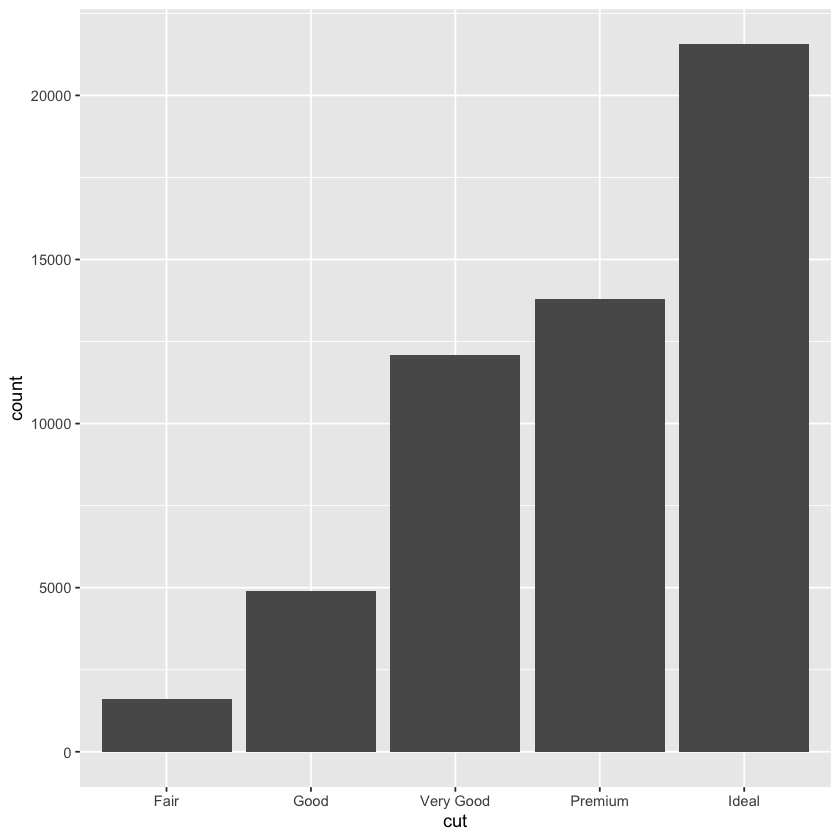

In [19]:
ggplot(diamonds)+
    geom_bar(aes(x=cut))

To examine the distribution of a continuous variable, use a histogram.
 ```r
 ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = carat), binwidth = 0.5)
```

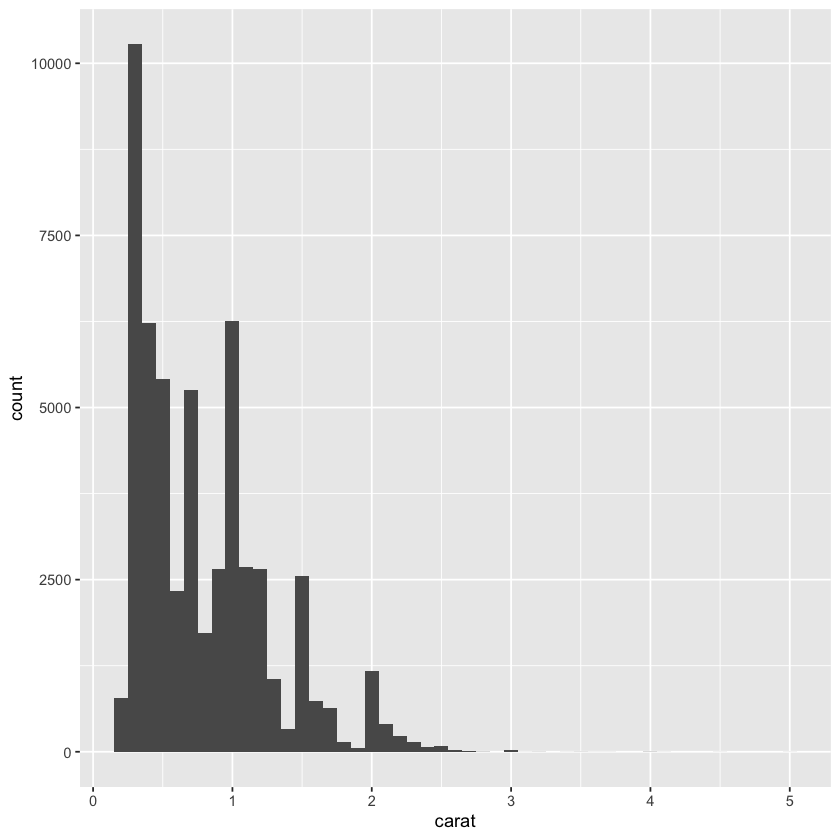

In [8]:
ggplot(diamonds)+
    geom_histogram(aes(x=carat),binwidth = 0.1)

 You should always explore a variety of binwidths when working with histograms, as different binwidths can reveal different patterns. For example, here is how the graph above looks when we zoom into just the diamonds with a size of less than three carats and choose a smaller binwidth.
```r
 diamonds %>%  filter(carat < 3) %>% 
  ggplot( mapping = aes(x = carat)) +
  geom_histogram(binwidth = 0.1)
```

There are many aspects we can look at the distribution.
<img src="./figures/EDA/descriptive.jpg" alt="ds" style="width: 750px;"/>

### Missing vaues
In any analysis, missing data can cause a problem. Thus, it’s best to get an understanding of missingness in your data right from the start. For example, in `flights` data, missing values in the dep_time variable indicate that the flight was cancelled. So you might want to compare the scheduled departure times for cancelled and non-cancelled times.



```r
flights %>% 
  mutate(
    cancelled = is.na(dep_time),
   time = hms::hms(hour = hour, minute = minute)
   ) %>% 
  ggplot(mapping = aes(time)) + 
    geom_histogram(mapping = aes(fill = cancelled), binwidth = 20)
```


```r
flights %>% 
  mutate(
    cancelled = is.na(dep_time),
   time = hms::hms(hour = hour, minute = minute)
   ) %>% 
  ggplot(mapping = aes(time)) + 
    geom_freqpoly(mapping = aes(color = cancelled), binwidth =20)
```

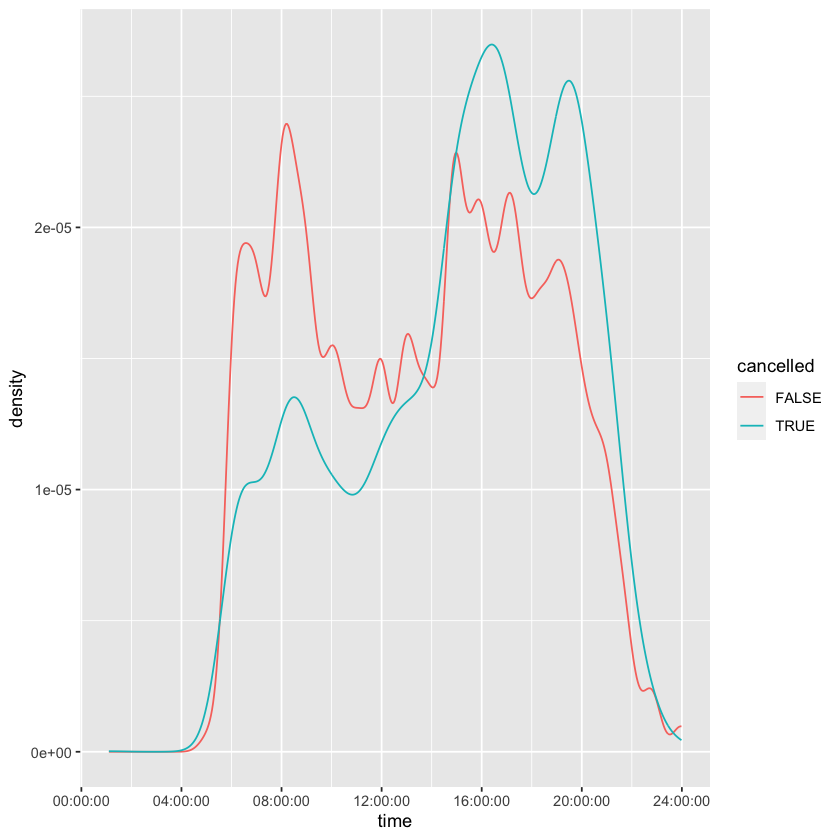

In [21]:
flights %>% 
    mutate(cancelled = is.na(dep_time) | is.na(arr_time),
           time = hms::hms(hour = hour, minute = minute)) %>% 
    ggplot()+
    geom_freqpoly(aes(x=time, color = cancelled),stat = "density")

However this plot is not great because there are many more non-cancelled flights than cancelled flights. 
We can improve this comparison by ploting the `density`.
```r
flights %>% 
  mutate(
    cancelled = is.na(dep_time),
   time = hms::hms(hour = hour, minute = minute)
   ) %>% 
  ggplot(mapping = aes(sched_dep_time)) + 
    geom_freqpoly(mapping = aes(color = cancelled), stat = "density")
```

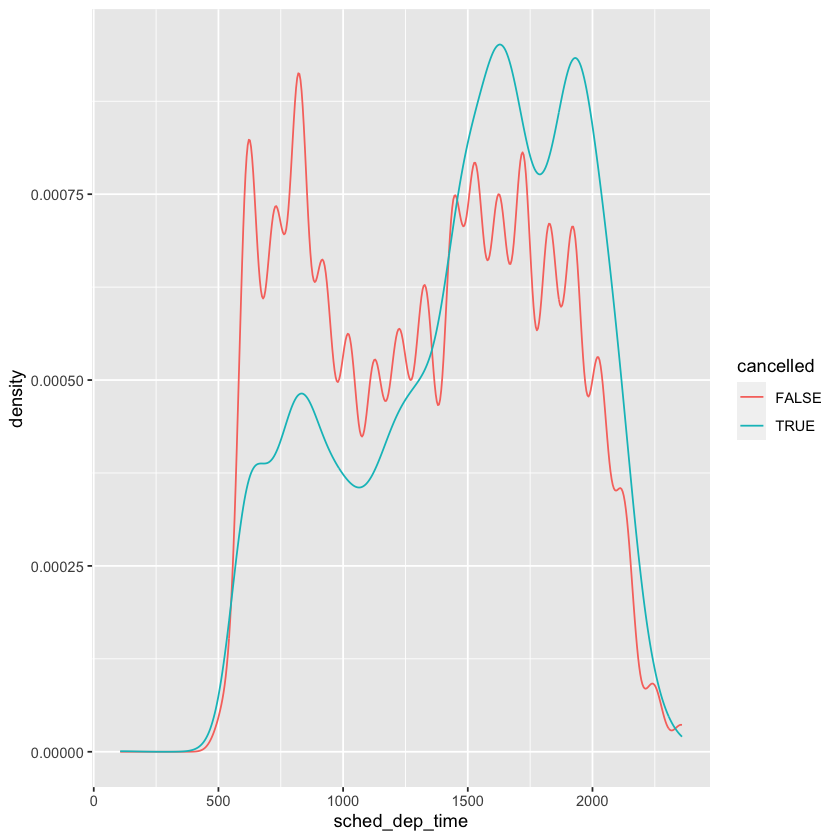

In [10]:
flights %>% 
  mutate(
    cancelled = is.na(dep_time),
   time = hms::hms(hour = hour, minute = minute)
   ) %>% 
  ggplot(mapping = aes(sched_dep_time)) + 
    geom_freqpoly(mapping = aes(color = cancelled), stat = "density")

### Shape
Determining the shape of your variable is essential before any further analysis is done. Statistical methods used for inference often require your data to be distributed in a certain manner before they can be applied to the data.

**Normal distribution**  (also referred to as the Gaussian distribution) is a very common distribution and is often described as a bell-shaped curve. In this distribution, the values are symmetric around the central value with a high density of the values falling right around the central value.

<img src="./figures/visualization/normal.jpg" alt="ds" style="width: 750px;"/>

A variable can be described as normally distributed if:   

* There is a strong tendency for data to take a central value --- many of the observations are centered around the middle of the range.  

* Deviations away from the central value are equally likely in both directions --- the frequency of these deviations away form the central value occurs at the same rate on either side of the central value.


**Skewed distribution**:  most of the values fall to one end of the range, leaving a tail off to the other side.

<img src="./figures/visualization/skew.jpg" alt="ds" style="width: 750px;"/>

**Uniform distribution**: values for a variable are equally likely to be found along any portion of the distribution. 

### Central tendency
The two most commonly used measures of central tendency are: mean and median. 
The mean (often referred to as the average) is equal to the sum of all the observations in the variable divided by the total number of observations in the variable. 

The median is the middle observation for a variable after the observations in that variable have been arranged in order of magnitude (from smallest to largest). The median is the middle value.


### Variation
In addition to measures of central tendency, measures of variability are key in describing the values within a variable.  Common and helpful measures of variability are: standard deviation, variance, and interquartile range. These are measures of how spread out the values in a variable are.



The variance tells you how spread out the values are. If all the values within your variable are exactly the same, that variable’s variance will be zero. The larger your variance, the more spread out your values are.  The standard deviation is the square root of the variance. The interquartile range is the difference between the third and the first quartiles.

## Outliers
Outliers are observations that are unusual. Sometimes outliers are data entry errors; other times outliers suggest important new science. When you have a lot of data, outliers are sometimes difficult to see in a histogram. For example, take the distribution of the `y` variable from the `diamonds` dataset. The only evidence of outliers is the unusually wide limits on the x-axis.

```r
ggplot(diamonds) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.5)
```

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.00,Very Good,H,VS2,63.3,53,5139,0.00,0.0,0.00
1.14,Fair,G,VS1,57.5,67,6381,0.00,0.0,0.00
2.00,Premium,H,SI2,58.9,57,12210,8.09,58.9,8.06
1.56,Ideal,G,VS2,62.2,54,12800,0.00,0.0,0.00
1.20,Premium,D,VVS1,62.1,59,15686,0.00,0.0,0.00
2.25,Premium,H,SI2,62.8,59,18034,0.00,0.0,0.00
0.51,Ideal,E,VS1,61.8,55,2075,5.15,31.8,5.12
0.71,Good,F,SI2,64.1,60,2130,0.00,0.0,0.00
0.71,Good,F,SI2,64.1,60,2130,0.00,0.0,0.00


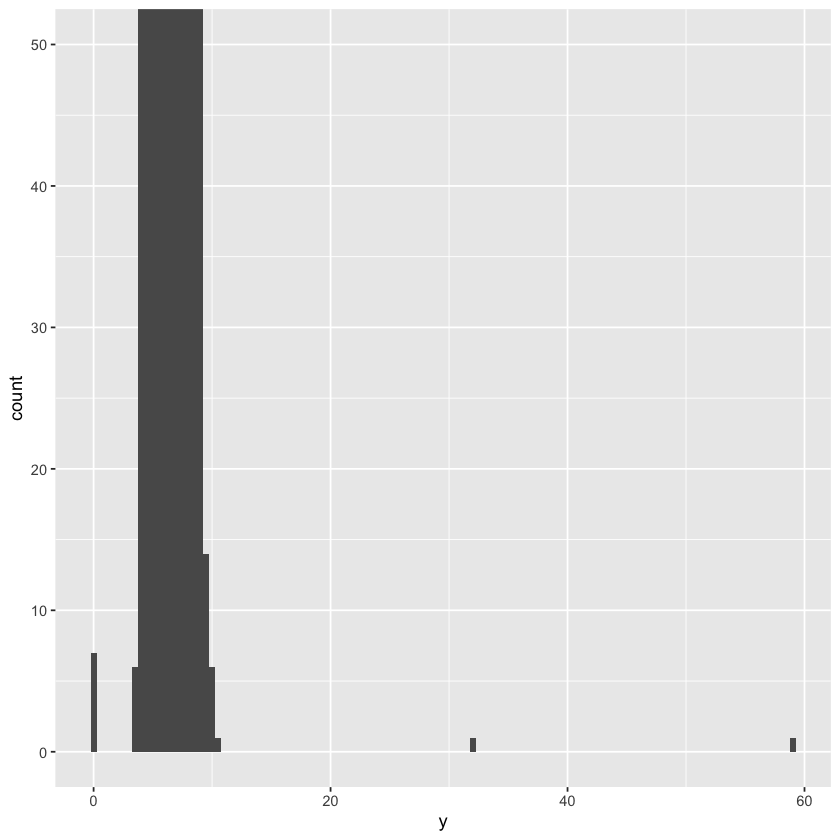

In [25]:
ggplot(diamonds)+
    geom_histogram(aes(x = y),binwidth = 0.5)+
    coord_cartesian(ylim = c(0,50))


diamonds %>% 
    filter( y < 1 | y > 20)

There are so many observations in the common bins that the rare bins are so short that you can’t see them. Let's zoom in.
```r
ggplot(diamonds) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.5)+
  coord_cartesian(ylim=c(0,50))
```

This allows us to see that there are three unusual values: 0, ~30, and ~60.

```r
 diamonds %>% 
  filter(y < 3 | y > 20) %>% 
  select(price, x, y, z) %>%
  arrange(y)
```
The `y` variable measures one of the three dimensions of these diamonds, in mm. We know that diamonds cannot have a width of 0mm, so these values must be incorrect. We might also suspect that measurements of 32mm and 59mm are implausible: those diamonds are over an inch long, but do not cost hundreds of thousands of dollars.


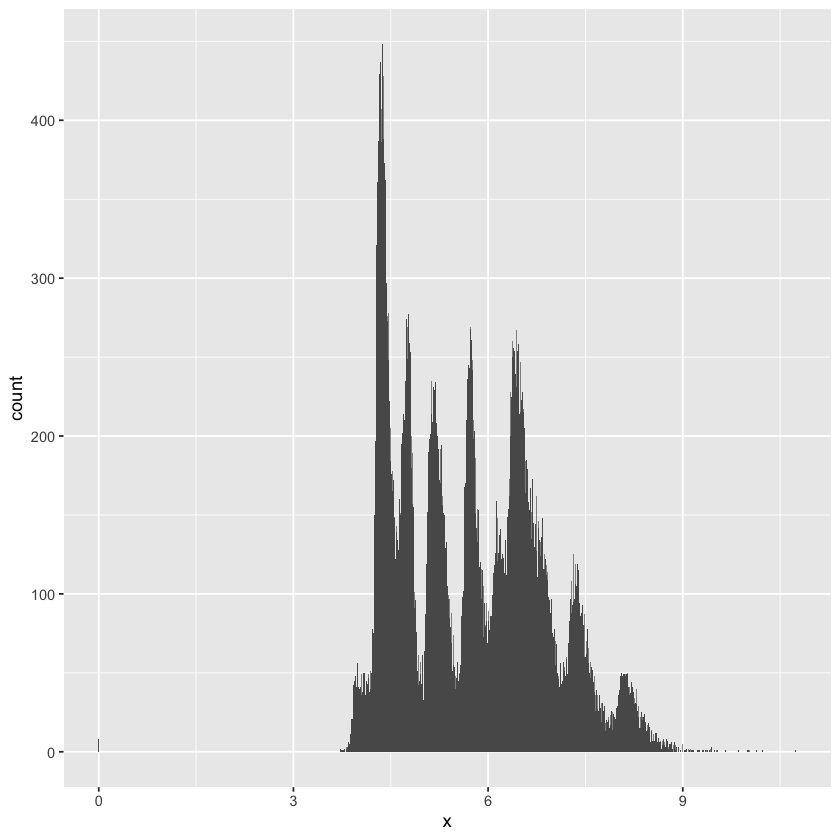

In [26]:
ggplot(diamonds) +
  geom_histogram(mapping = aes(x = x), binwidth = 0.01)

It is good practice to repeat your analysis with and without the outliers. If they have minimal effect on the results, and you cannot figure out why they are there, it is reasonable to replace them with missing values, and move on. However, if they have a substantial effect on your results, you should not drop them without justification. You will need to figure out what caused them and disclose that you removed them in your write-up.


## Your turn
* Explore the distribution of each of the `x`, `y`, and `z` variables in diamonds. What do you learn? Think about a diamond and how you might decide which dimension is the length, width, and depth.

<!-- ```{r eval=FALSE,echo=FALSE}
summary(select(diamonds, x, y, z))
ggplot(diamonds) +
  geom_histogram(mapping = aes(x = x), binwidth = 0.01)
ggplot(diamonds) +
  geom_histogram(mapping = aes(x = y), binwidth = 0.01)
ggplot(diamonds) +
  geom_histogram(mapping = aes(x = z), binwidth = 0.01)
 
```-->


<!-- According to the documentation for diamonds, x is length, y is width, and z is depth. If documentation were unavailable, I would compare the values of the variables to match them to the length, width, and depth. I would expect length to always be less than width, otherwise the length would be called the width. I would also search for the definitions of length, width, and depth with respect to diamond cuts. Depth can be expressed as a percentage of the length/width of the diamond, which means it should be less than both the length and the width. -->
<!--```{r eval=FALSE,echo=FALSE}
summarize(diamonds, mean(x > y), mean(x > z), mean(y > z))
```-->








* Explore the distribution of price. Do you discover anything unusual or surprising? 
The last digits of prices are often not uniformly distributed. Plot the distribution of the last one and two digits of prices 

<!--```{r eval=FALSE,echo=FALSE}
ggplot(filter(diamonds, price < 2500), aes(x = price)) +
  geom_histogram(binwidth = 10, center = 0)
```-->

<!-- There are no diamonds with a price of $1,500 (between $1,455 and $1,545, including). 
There’s a bulge in the distribution around $750. -->

<!--```{r eval=FALSE,echo=FALSE}
diamonds %>%
  mutate(ending = price %% 100) %>%
  ggplot(aes(x = ending)) +
  geom_histogram(binwidth = 1)

diamonds %>%
  mutate(ending = price %% 100) %>%
  group_by(ending) %>%
  count() %>%
arrange(desc(n))%>%
  print(n=Inf)

diamonds %>%
  mutate(ending = price %/% 10 %% 10) %>%
  ggplot(aes(x = ending)) +
  geom_histogram(binwidth = 1)

table(diamonds$price %/% 100 %% 10)
```-->

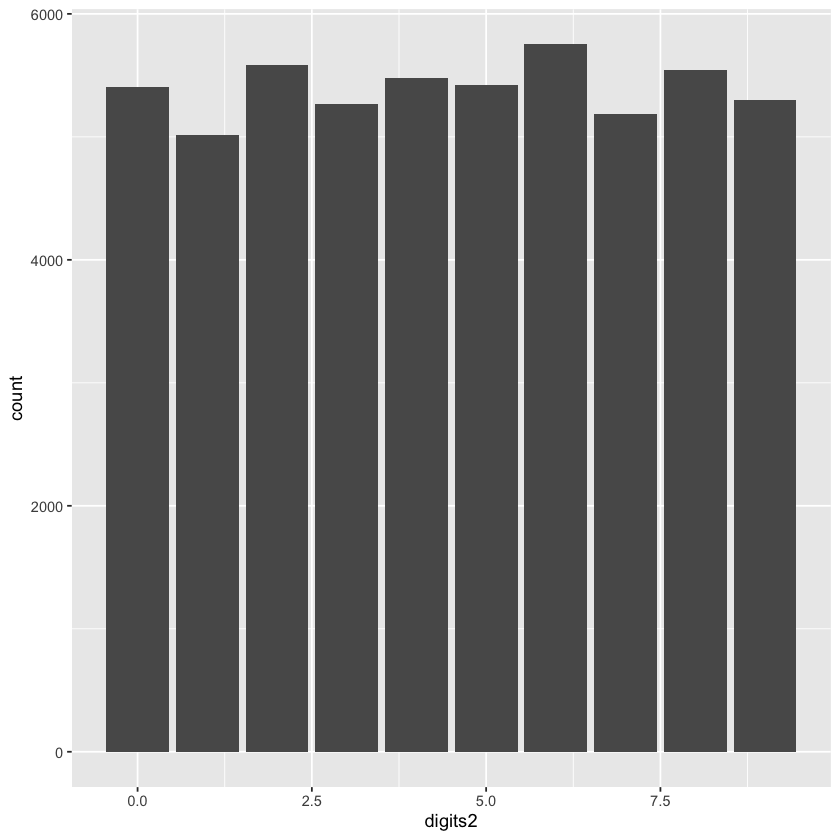

In [39]:
diamonds %>% 
    mutate(digits2 = price %% 10) %>% 
    ggplot()+
    geom_bar(aes(x=digits2))



##  Examples
We can ask many questions based on the distribution of a variable. Sometimes, we need to look at several variables together to answer these questions.
For example, we can ask

* Which values are the most common? Why?

* Which values are rare? Why? Does that match your expectations?

* Can you see any unusual patterns? What might explain them?

```r
 diamonds %>%  filter(carat < 3) %>% 
ggplot( mapping = aes(x = carat)) +
  geom_histogram(binwidth = 0.01)
```

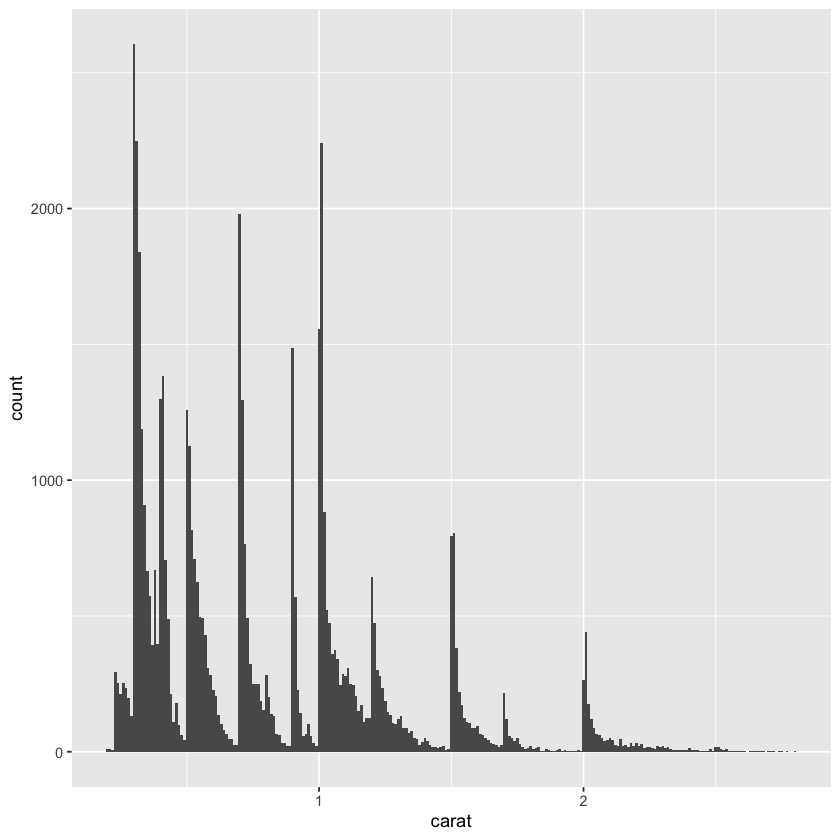

In [5]:
diamonds  %>% filter(carat < 3) %>% 
    ggplot()+
    geom_histogram(aes(x=carat),binwidth = 0.01)

* Why are there more diamonds at whole carats and common fractions of carats?

* Why are there more diamonds slightly to the right of each peak than there are slightly to the left of each peak?

```r
 diamonds %>%  filter(carat < 3) %>% 
  group_by(carat) %>% 
  summarize(price_avg = mean(price)) %>% 
  ggplot(aes(x=carat, y =price_avg))+
  geom_point()
```

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



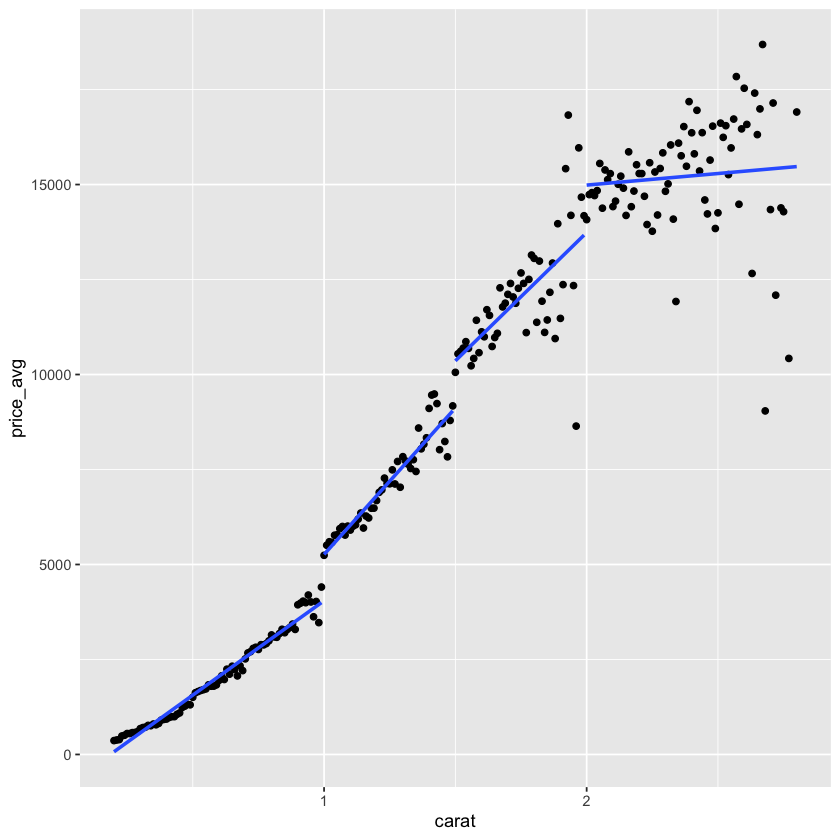

In [15]:
diamonds_price <- diamonds %>% filter(carat<3) %>% 
    group_by(carat) %>% 
    summarize(price_avg = mean(price))

ggplot(data=diamonds_price)+
    geom_point(aes(x=carat,y=price_avg))+
    geom_smooth(data= filter(diamonds_price, carat<1), aes(x=carat,y=price_avg),method=lm,se=FALSE)+
    geom_smooth(data= filter(diamonds_price,carat>=1,carat<1.5), aes(x=carat,y=price_avg),method=lm,se=FALSE)+
    geom_smooth(data= filter(diamonds_price,carat>=1.5,carat<2), aes(x=carat,y=price_avg),method=lm,se=FALSE)+
    geom_smooth(data= filter(diamonds_price,carat>=2), aes(x=carat,y=price_avg),method=lm,se=FALSE)

```r
 diamonds_price <- diamonds %>%  filter(carat < 3) %>% 
  group_by(carat) %>% 
  summarize(price_avg = mean(price)) 


  ggplot(data=diamonds_price)+
  geom_point(aes(x=carat, y =price_avg))+
  geom_smooth(data = filter(diamonds_price,carat <0.5),aes(x=carat, y =price_avg),method = lm,se=FALSE)+
     geom_smooth(data = filter(diamonds_price,carat>=0.5,carat<1),aes(x=carat, y =price_avg),method = lm,se=FALSE)+
     geom_smooth(data = filter(diamonds_price,carat>=1,carat<1.5),aes(x=carat, y =price_avg),method = lm,se=FALSE)+
    geom_smooth(data = filter(diamonds_price,carat>=1.5,carat<2),aes(x=carat, y =price_avg),method = lm,se=FALSE)+
     geom_smooth(data = filter(diamonds_price,carat>=2),aes(x=carat, y =price_avg),method = lm,se=FALSE)
```

Clusters of similar values suggest that subgroups exist in your data. To understand the subgroups, ask:

* How are the observations within each cluster similar to each other?

* How are the observations in separate clusters different from each other?

* How can you explain or describe the clusters?

* Why might the appearance of clusters be misleading?


```r
ggplot(data = faithful, mapping = aes(x = eruptions)) + 
  geom_histogram(binwidth = 0.25)
```



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



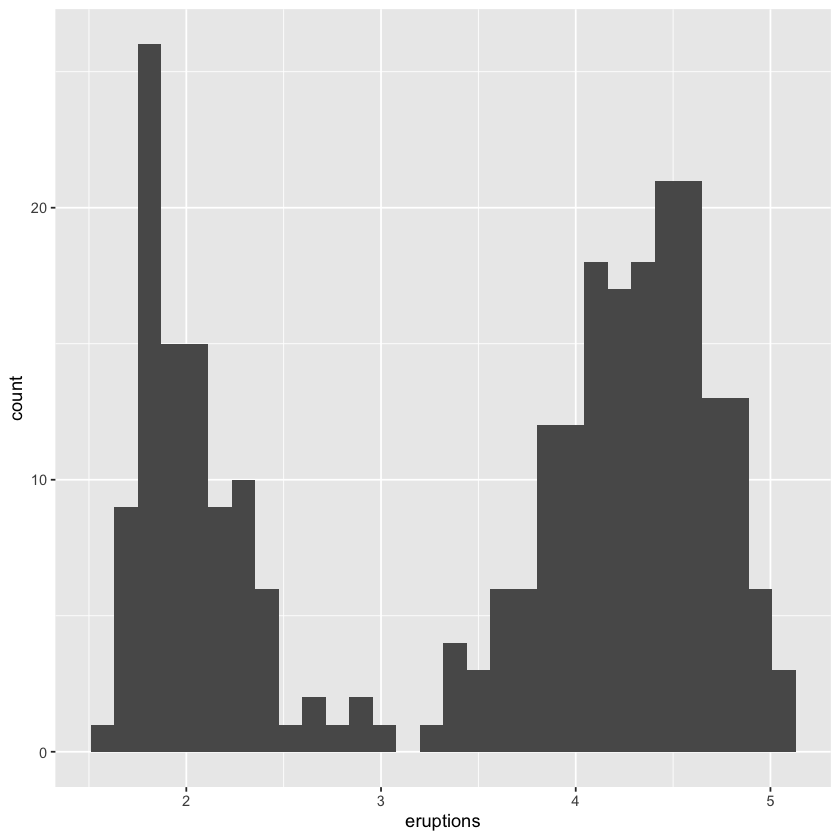

In [17]:
ggplot(faithful)+
    geom_histogram(aes(x=eruptions))


# Multivariate EDA
Multivariate EDA describes the tendency for the values of two or more variables to vary together in a related way. The best way to do multivariate EDA is to visualize the relationship between two or more variables.


## A categorical variable and a continuous variable
It is common to want to explore the distribution of a continuous variable broken down by a categorical variable. 

<!-- The default appearance of `geom_freqpoly()` is not that useful for that sort of comparison because the height is given by the count. That means if one of the groups is much smaller than the others, it’s hard to see the differences in shape. For example, let’s explore how the price of a diamond varies with its quality: -->


```r
ggplot(data=diamonds, mapping=aes(x=price,fill = cut))+
  geom_histogram()
```


```r
ggplot(data = diamonds, mapping = aes(x = price)) + 
  geom_freqpoly(mapping = aes(color = cut))
```

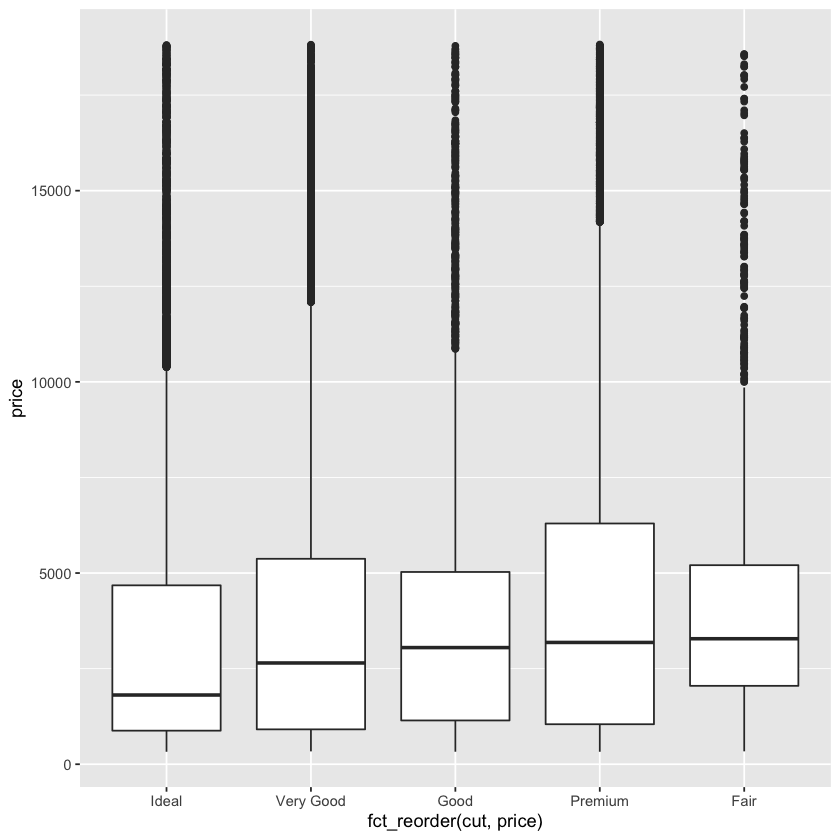

In [23]:
ggplot(diamonds)+
    geom_boxplot(aes(y=price,x = fct_reorder(cut,price)   ))



It’s hard to see the difference in distribution because the overall counts differ so much.
To make the comparison easier we need to swap what is displayed on the y-axis. Instead of displaying count, we’ll display density, which is the count standardised so that the area under each frequency polygon is one.
```r
ggplot(data = diamonds, mapping = aes(x = price)) + 
  geom_freqpoly(mapping = aes(colour = cut),stat="density")
```


```r
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot()
```

We see much less information about the distribution, but the boxplots are much more compact so we can more easily compare them (and fit more on one plot). It supports the counterintuitive finding that better quality diamonds are cheaper on average.

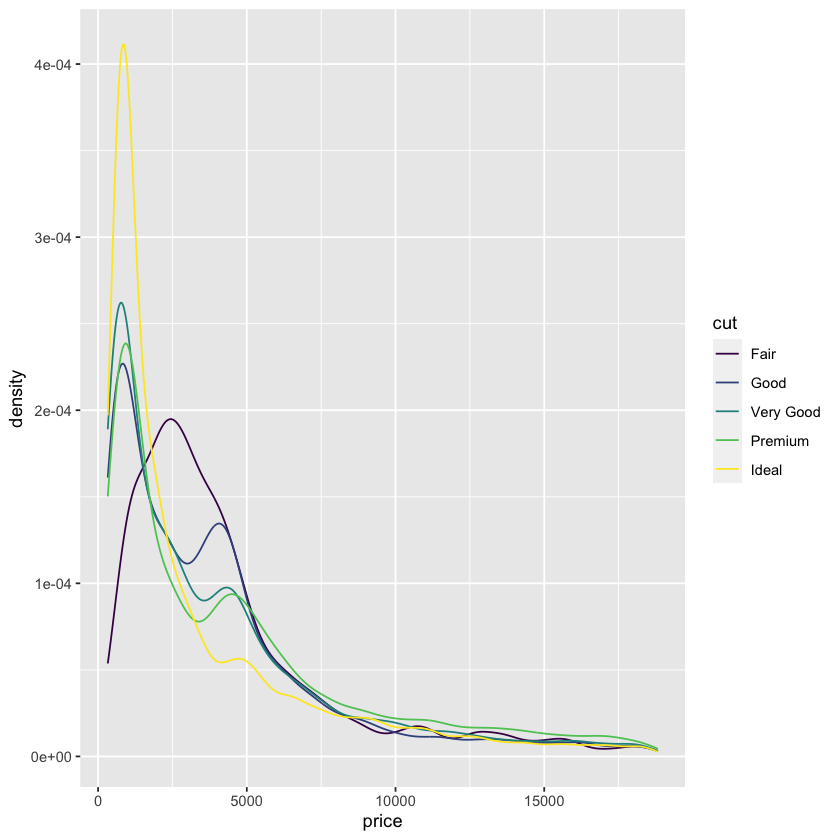

In [6]:
ggplot(data = diamonds, mapping = aes(x = price)) + 
  geom_freqpoly(mapping = aes(colour = cut),stat="density")


`cut` is an ordered factor: fair is worse than good, which is worse than very good and so on. Many categorical variables don’t have such an intrinsic order, so you might want to reorder them to make a more informative display.

```r
ggplot(data = diamonds, mapping = aes(x = fct_reorder(cut,price,.fun=median), y = price)) +
  geom_boxplot()
```

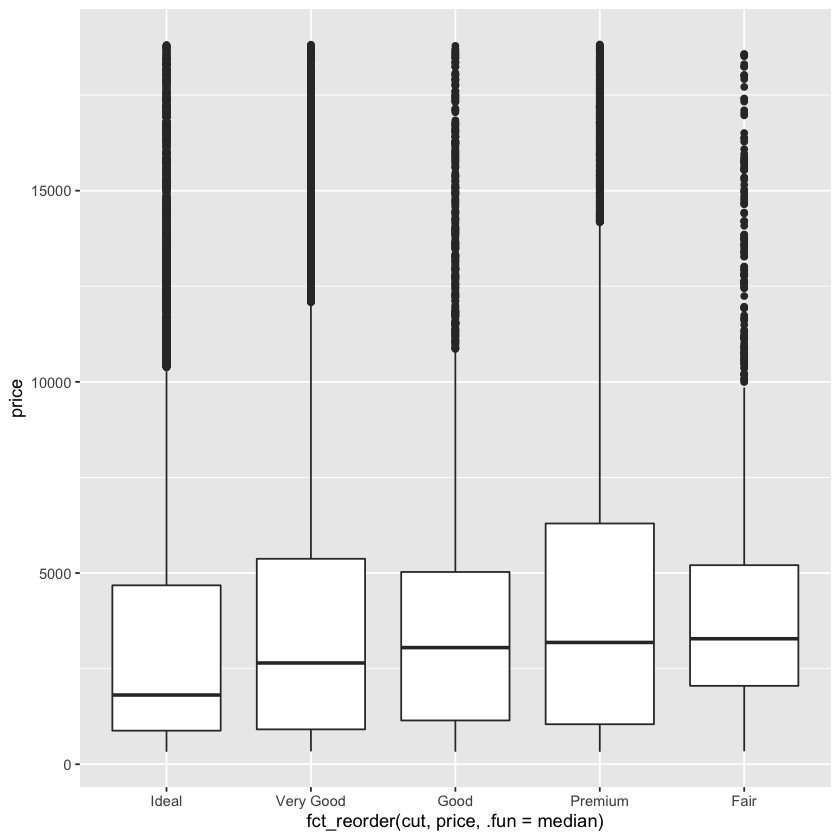

In [7]:
ggplot(data = diamonds, mapping = aes(x = fct_reorder(cut,price,.fun=median), y = price)) +
  geom_boxplot()

For example, take the `class` variable in the mpg dataset. You might be interested to know how highway mileage varies across classes:
```r
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = class, y = hwy))
```

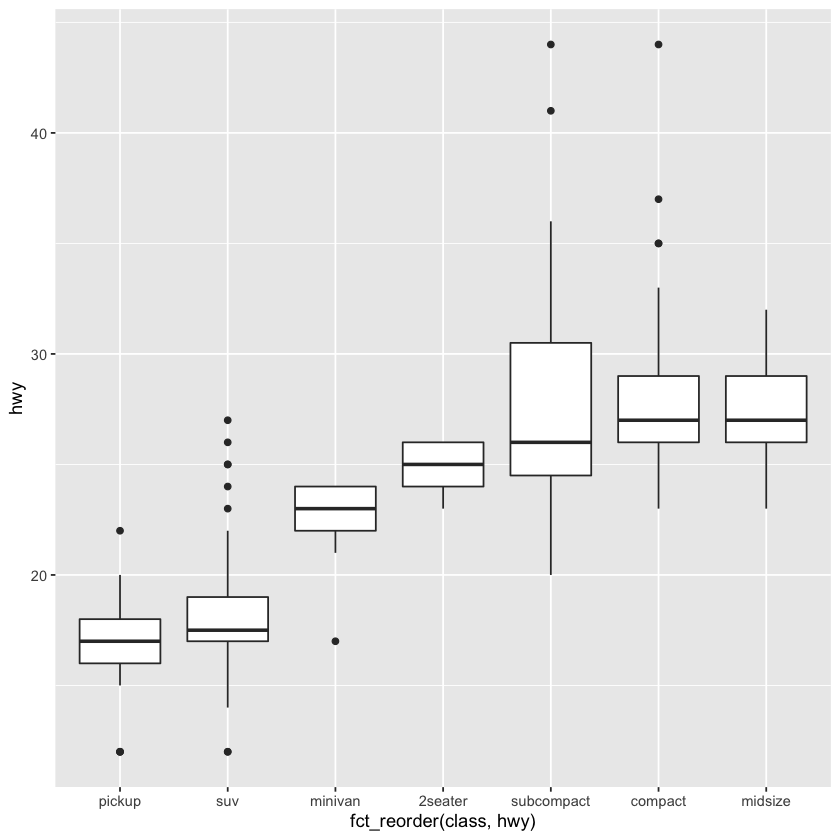

In [27]:
ggplot(data=mpg)+
    geom_boxplot(aes(x=fct_reorder(class,hwy)  ,y=hwy))

To make the trend easier to see, we can reorder class based on the median value of hwy:
```r
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = fct_reorder(class, hwy), y = hwy))
```


### Your turn
* Use boxplot to visualize the scheduled departure times of cancelled vs. non-cancelled flights.
<!--```{r eval= FALSE, echo = FALSE}
flights %>%
  mutate(
    cancelled = is.na(dep_time),
   time = hms::hms(hour = hour, minute = minute)
   ) %>%
  ggplot() +
  geom_boxplot(mapping = aes(y = time, x = cancelled))
```-->



In [33]:
flights %>% 
    mutate(cancelled = is.na(dep_time)|is.na(arr_time),
            time = hms::hms(hour=hour,min=minute) ) 



year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,cancelled,time
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<lgl>,<time>
2013,1,1,517,515,2,830,819,11,UA,⋯,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,FALSE,05:15:00
2013,1,1,533,529,4,850,830,20,UA,⋯,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,FALSE,05:29:00
2013,1,1,542,540,2,923,850,33,AA,⋯,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,FALSE,05:40:00
2013,1,1,544,545,-1,1004,1022,-18,B6,⋯,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,FALSE,05:45:00
2013,1,1,554,600,-6,812,837,-25,DL,⋯,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,FALSE,06:00:00
2013,1,1,554,558,-4,740,728,12,UA,⋯,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,FALSE,05:58:00
2013,1,1,555,600,-5,913,854,19,B6,⋯,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,FALSE,06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,⋯,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,FALSE,06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,⋯,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,FALSE,06:00:00


## Two categorical variables
To visualize the relationship between categorical variables, you can count the number of observations for each combination. 


```{r}
ggplot(data = diamonds)+
  geom_bar(aes(x= color, fill = cut),position = "dodge")

ggplot(data = diamonds)+
  geom_bar(aes(x= color, fill = cut),position = "fill")
```


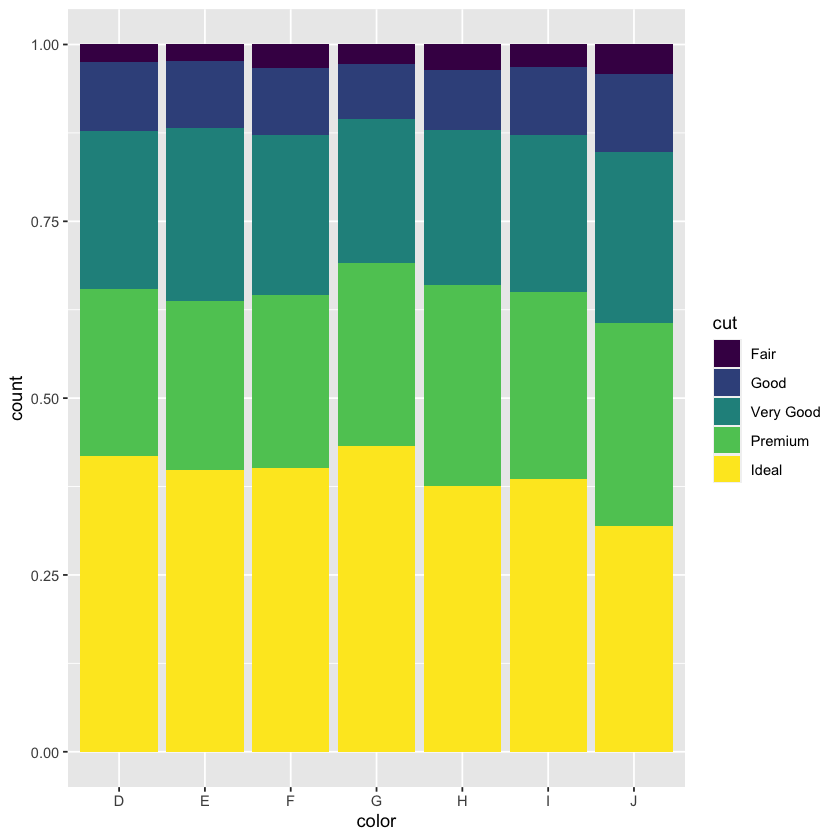

In [3]:
ggplot(data = diamonds)+
    geom_bar(aes(x= color, fill = cut), position = "fill" )


Another way to do that is to rely on the `geom_count()` function

```r

ggplot(data = diamonds) +
  geom_count(mapping = aes(x = cut, y = color))
```


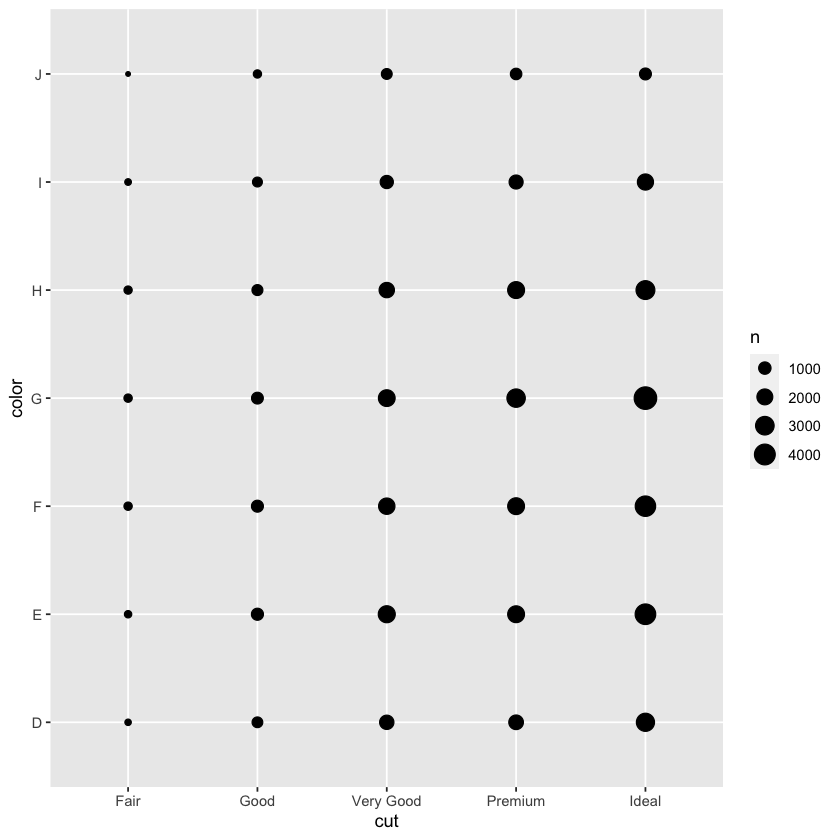

In [4]:
ggplot(data = diamonds)+
    geom_count( aes(x = cut, y = color))

The size of each circle in the plot displays how many observations occurred at each combination of values. 

Another approach is to compute the count:
```r
diamonds %>% count(cut,color)
```

You can visualize with `geom_tile()` and the fill aesthetic
```r
diamonds %>% 
  count(color, cut) %>%  
  ggplot(mapping = aes(x = color, y = cut)) +
    geom_tile(mapping = aes(fill = n))
```

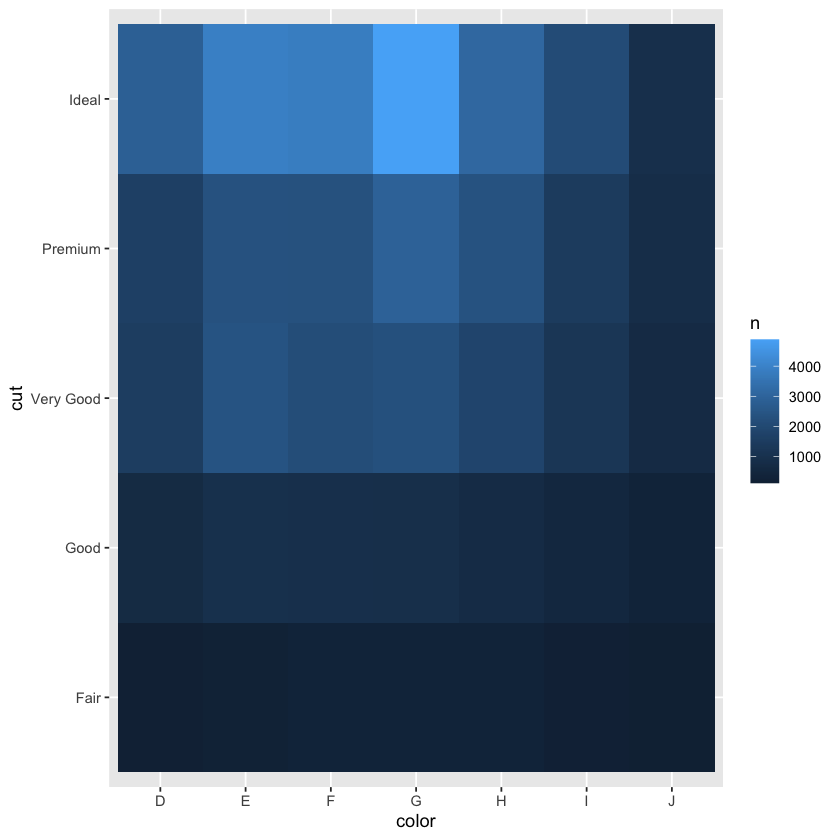

In [10]:
diamonds %>% count(color,cut) %>% 
    ggplot()+
    geom_tile( aes(x = color, y =cut, fill = n))

We can  show the distribution of `cut` within `color`, calculate a new variable `prop` which is the proportion of each cut within a color. 
```r
diamonds %>%
  count(color, cut) %>%
  group_by(color) %>%
  mutate(prop = n / sum(n)) %>%
  ggplot(mapping = aes(x = color, y = cut)) +
  geom_tile(mapping = aes(fill = prop))
```

In [14]:
diamonds %>% count(color,cut) %>% 
    group_by(color) %>% 
    mutate(prop = n/sum(n))

color,cut,n,prop
<ord>,<ord>,<int>,<dbl>
D,Fair,163,0.02405904
D,Good,662,0.09771218
D,Very Good,1513,0.22332103
D,Premium,1603,0.23660517
D,Ideal,2834,0.41830258
E,Fair,224,0.02286414
E,Good,933,0.09523323
E,Very Good,2400,0.24497295
E,Premium,2337,0.23854241


## Two continuous variables
You can use a scatterplot to  visualize the relationship between two continuous variables.

```r
ggplot(data = diamonds) +
  geom_point(mapping = aes(x = carat, y = price))
```

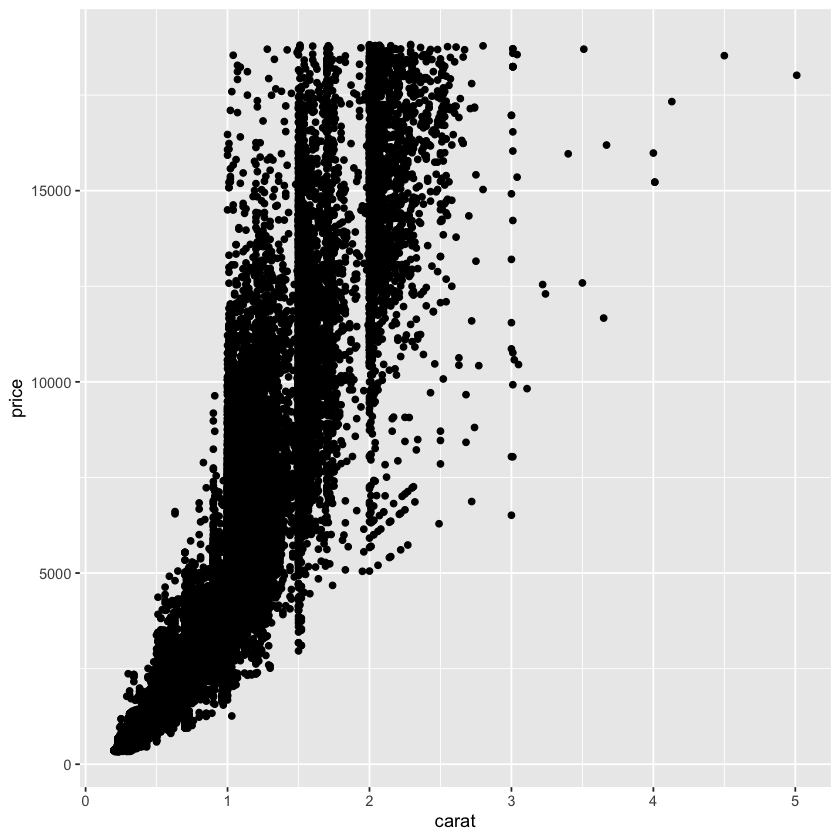

In [15]:
ggplot(data=diamonds)+
    geom_point(aes(x=carat, y= price))

Another option is to bin one continuous variable so it acts like a categorical variable. Then you can use one of the techniques for visualizing the combination of a categorical and a continuous variable that you learned about.

```r
ggplot(data = diamonds, mapping = aes(x = carat, y = price)) + 
  geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)))
```


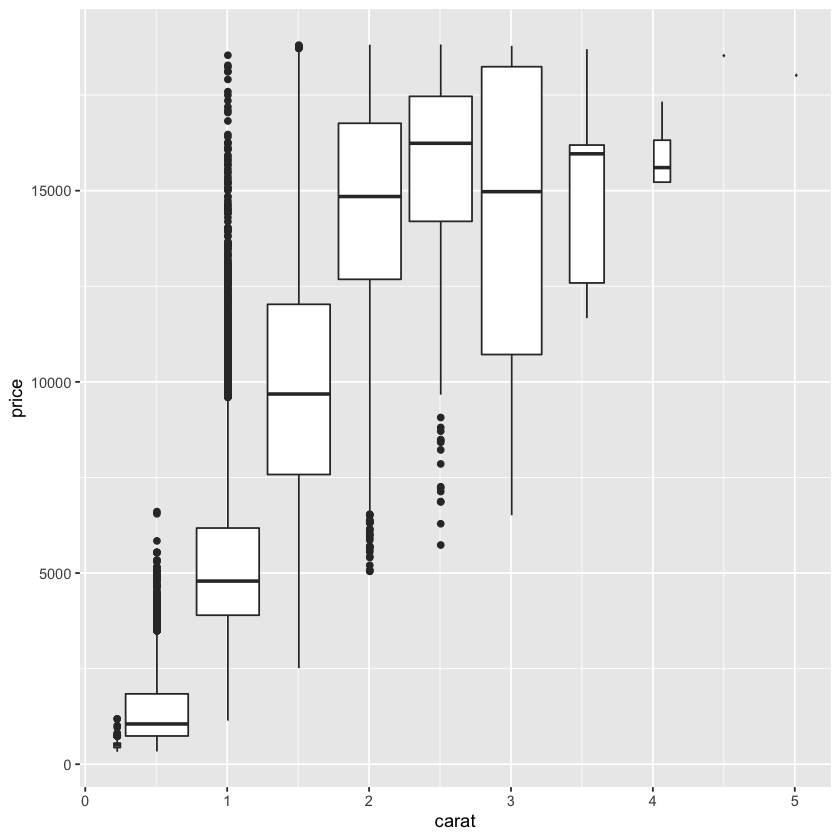

In [18]:
ggplot(data=diamonds)+
    geom_boxplot( aes(x=carat, y =price,  group= cut_width(carat,0.5)))

## Your turn


* What variable in the diamonds dataset is most important for predicting the price of a diamond? (consider variables: `carat`, `clarity`, `color`, and `cut`) How is that variable correlated with `cut`? Why does the combination of those two relationships lead to lower quality diamonds being more expensive?

<!--```{r eval= FALSE, echo = FALSE}
ggplot(data = diamonds, mapping = aes(x = carat, y = price)) +
  geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)))

diamonds %>%
  mutate(color = fct_rev(color)) %>%
  ggplot(aes(x = color, y = price)) +
  geom_boxplot()

diamonds %>% 
  ggplot()+
  geom_boxplot(aes(y=carat,x = fct_rev(color)))



ggplot(data = diamonds) +
  geom_boxplot(mapping = aes(x = clarity, y = price))


diamonds %>% 
  ggplot()+
  geom_boxplot(aes(y=carat,x = clarity))


ggplot(data = diamonds)+
  geom_bar(aes(x=color,fill=clarity),position="dodge")

diamonds %>% 
  count(color,clarity) %>% 
ggplot()+
  geom_tile(aes(x=color,y=clarity,fill=n))

diamonds %>%
  count(color, clarity) %>%
  group_by(color) %>%
  mutate(prop = n / sum(n)) %>%
  ggplot(mapping = aes(x = color, y = clarity)) +
  geom_tile(mapping = aes(fill = prop))

```-->

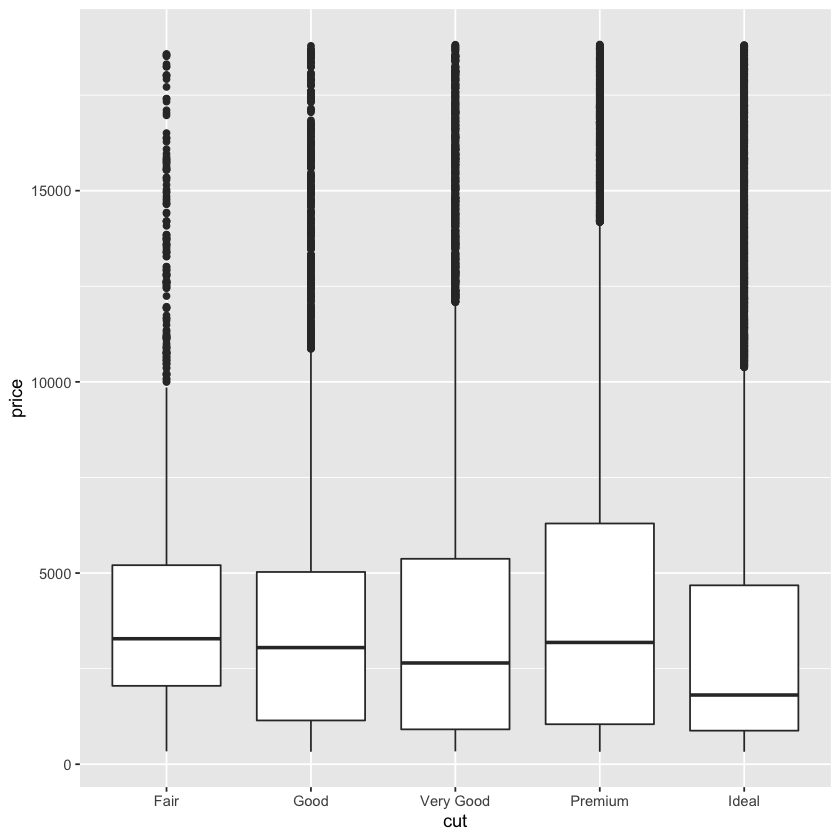

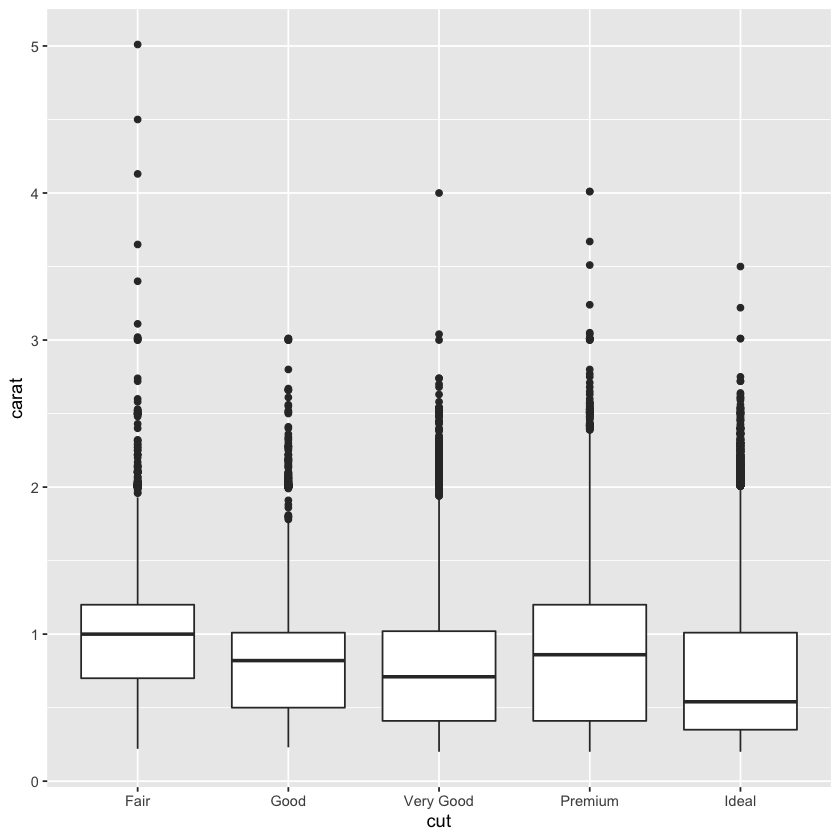

In [21]:
ggplot(diamonds)+
    geom_boxplot(aes(y=price, x= cut))

ggplot(diamonds)+
    geom_boxplot(aes(y=carat, x= cut))

